In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.
c:\users\aditya\miniconda3\envs\py36\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
#Creating the circles 
np.random.seed(42)
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state = 123, noise=0.1, factor=0.2)
print(X) 
print(y)

[[ 6.98553633e-01 -3.78289607e-01]
 [-2.48422424e-01  1.91071221e-01]
 [-1.78759035e-01  2.53697475e-01]
 [-7.30467124e-03 -2.59266690e-01]
 [-1.59844140e-01  2.66915921e-01]
 [-8.01071690e-01 -1.08656135e-01]
 [ 1.00816914e+00  2.07309295e-01]
 [ 4.39780516e-02 -2.80236072e-01]
 [-8.34853704e-02 -1.38114367e-01]
 [-9.88928208e-01 -9.26102014e-02]
 [ 8.83638650e-02  1.96647051e-01]
 [ 2.22010570e-01  5.62848283e-02]
 [ 7.74176833e-01  8.22258534e-01]
 [ 6.42098042e-02  1.77475658e-01]
 [ 3.29904597e-01 -6.76348560e-02]
 [ 9.37162087e-01  2.05987221e-01]
 [-2.00792169e-01  5.35547075e-02]
 [ 5.32997317e-02 -2.82138380e-01]
 [-9.93783900e-02 -3.28183801e-01]
 [ 1.02684872e+00 -2.66939738e-01]
 [-8.69193490e-01  6.85448273e-01]
 [-6.70339467e-03  2.44518907e-01]
 [ 2.31538284e-02 -8.12416827e-01]
 [ 1.03822075e-01  1.19298417e-01]
 [-9.57389366e-01 -3.49206448e-01]
 [-7.98982279e-02  2.30581375e-01]
 [ 1.31496662e-01  4.30585961e-02]
 [ 3.68169092e-02  9.51356467e-01]
 [ 6.71357733e-01 -8

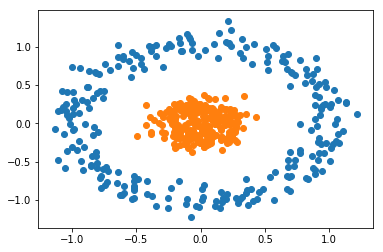

In [3]:
#Let's plot it
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [8]:
#The DNN model
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr = 0.01), 'binary_crossentropy', metrics=['accuracy'])

In [9]:
h = model.fit(x=X, y=y, verbose =1, batch_size = 20, epochs = 100, shuffle = 'true' )
# Remember verbose show the progress bar per epoch

Epoch 1/100
500/500 [==============================] - 1s 2ms/step - loss: 0.8561 - acc: 0.5000
Epoch 2/100
500/500 [==============================] - 0s 122us/step - loss: 0.7339 - acc: 0.5000
Epoch 3/100
500/500 [==============================] - 0s 128us/step - loss: 0.7001 - acc: 0.5420
Epoch 4/100
500/500 [==============================] - 0s 122us/step - loss: 0.6973 - acc: 0.4940
Epoch 5/100
500/500 [==============================] - 0s 95us/step - loss: 0.6954 - acc: 0.4480
Epoch 6/100
500/500 [==============================] - 0s 84us/step - loss: 0.6950 - acc: 0.4920
Epoch 7/100
500/500 [==============================] - 0s 78us/step - loss: 0.6948 - acc: 0.4240
Epoch 8/100
500/500 [==============================] - 0s 86us/step - loss: 0.6946 - acc: 0.5860
Epoch 9/100
500/500 [==============================] - 0s 91us/step - loss: 0.6943 - acc: 0.4680
Epoch 10/100
500/500 [==============================] - 0s 80us/step - loss: 0.6940 - acc: 0.4420
Epoch 11/100
500/500 [=====

500/500 [==============================] - 0s 72us/step - loss: 0.3275 - acc: 0.8840
Epoch 85/100
500/500 [==============================] - 0s 78us/step - loss: 0.3236 - acc: 0.8840
Epoch 86/100
500/500 [==============================] - 0s 86us/step - loss: 0.3187 - acc: 0.8840
Epoch 87/100
500/500 [==============================] - 0s 86us/step - loss: 0.3146 - acc: 0.8860
Epoch 88/100
500/500 [==============================] - 0s 86us/step - loss: 0.3097 - acc: 0.8780
Epoch 89/100
500/500 [==============================] - 0s 92us/step - loss: 0.3043 - acc: 0.8880
Epoch 90/100
500/500 [==============================] - 0s 88us/step - loss: 0.2995 - acc: 0.8880
Epoch 91/100
500/500 [==============================] - 0s 96us/step - loss: 0.2917 - acc: 0.8840
Epoch 92/100
500/500 [==============================] - 0s 84us/step - loss: 0.2857 - acc: 0.8880
Epoch 93/100
500/500 [==============================] - 0s 100us/step - loss: 0.2795 - acc: 0.8940
Epoch 94/100
500/500 [==========

Text(0.5,0,'epoch')

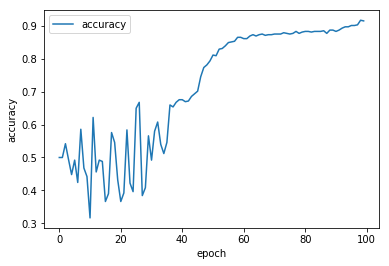

In [10]:
#Plotting the accuracy
plt.plot(h.history['acc'])
plt.legend(['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')


Text(0.5,0,'epoch')

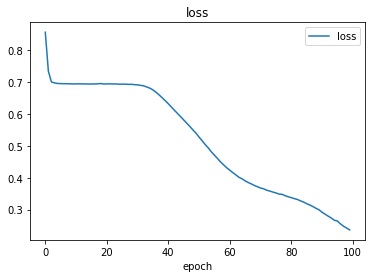

In [11]:
#Plotting the loss
plt.plot(h.history['loss'])
plt.legend(['loss'])
plt.title('loss')
plt.xlabel('epoch')

In [12]:
#Define the decision boundary
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25)
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

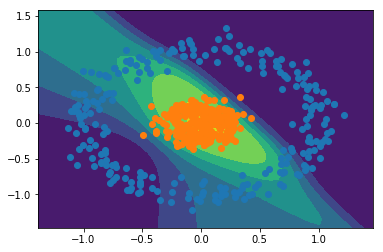

In [13]:
plot_decision_boundary(X, y, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

Prediction is:  [[0.15693423]]


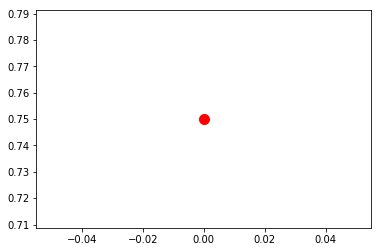

In [15]:
x = 0
y = 0.75
 
point = np.array([[x, y]])
predict = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is: ", predict)